In [41]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [17]:
y_train.shape

(60000,)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

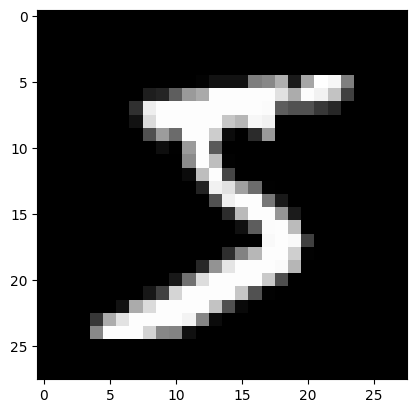

In [10]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

#### Flattening the dataset

In [16]:
x_train = x_train.reshape((60000,784))
x_test = x_test.reshape((10000,784))

In [23]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

### Model Building with Tensorflow

1. Model Initialization  - Defining the architecture of the DL model
2. Model Compilation - Define the loss function, optimization functions
3. Model Training - # Epochs, etc.

In [47]:
#Model Init
model = Sequential() # Blank Model
model.add(Input(shape = (784))) # Input Layer
model.add(Dense(units = 256, activation='tanh'))
model.add(Dense(units = 10, activation='softmax')) #Output Layer

In [48]:
#Model Compilation
model.compile(optimizer = Adam(learning_rate=0.001),
              loss="categorical_crossentropy", 
              metrics="accuracy")

In [49]:
# Model fit
history = model.fit(x=x_train, 
                    y= y_train_ohe, 
                    epochs=30 , 
                    batch_size = 1000,
                    validation_data= (x_test,y_test_ohe))

Epoch 1/30
60/60 [==============================] - 1s 13ms/step - loss: 0.7310 - accuracy: 0.7754 - val_loss: 0.3638 - val_accuracy: 0.8998
Epoch 2/30
60/60 [==============================] - 1s 11ms/step - loss: 0.3356 - accuracy: 0.9030 - val_loss: 0.2867 - val_accuracy: 0.9174
Epoch 3/30
60/60 [==============================] - 1s 11ms/step - loss: 0.2809 - accuracy: 0.9177 - val_loss: 0.2616 - val_accuracy: 0.9223
Epoch 4/30
60/60 [==============================] - 1s 11ms/step - loss: 0.2518 - accuracy: 0.9270 - val_loss: 0.2435 - val_accuracy: 0.9271
Epoch 5/30
60/60 [==============================] - 1s 13ms/step - loss: 0.2325 - accuracy: 0.9315 - val_loss: 0.2194 - val_accuracy: 0.9343
Epoch 6/30
60/60 [==============================] - 1s 10ms/step - loss: 0.2170 - accuracy: 0.9359 - val_loss: 0.2155 - val_accuracy: 0.9378
Epoch 7/30
60/60 [==============================] - 1s 12ms/step - loss: 0.2085 - accuracy: 0.9398 - val_loss: 0.2046 - val_accuracy: 0.9390
Epoch 8/30
60

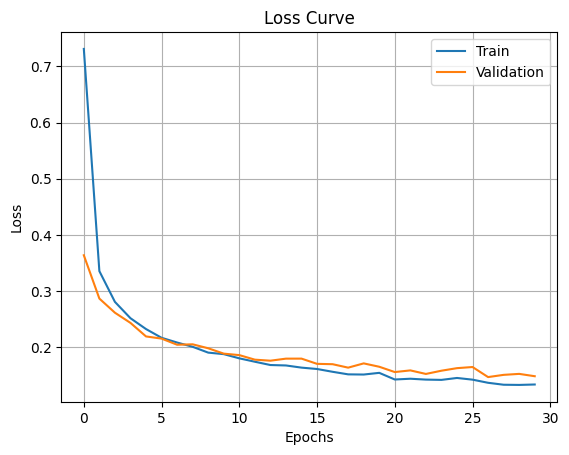

In [50]:
# Loss curve
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.grid()
plt.show()

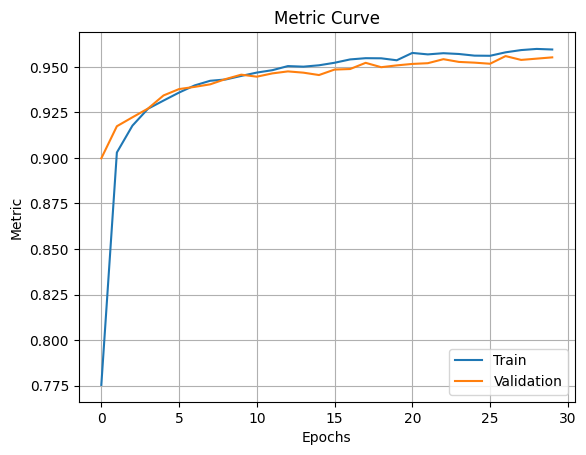

In [52]:
# Metric curve
train_metric = history.history['accuracy']
val_metric = history.history['val_accuracy']

plt.plot(train_metric)
plt.plot(val_metric)
plt.legend(['Train', 'Validation'])
plt.xlabel('Epochs')
plt.ylabel('Metric')
plt.title("Metric Curve")
plt.grid()
plt.show()

### Predictions

In [55]:
import numpy as np

In [58]:
model.predict(x_test[:2])

array([[3.7010182e-07, 1.0071440e-08, 2.7517183e-06, 4.4075219e-05,
        2.4203160e-08, 1.1142956e-06, 6.0915244e-12, 9.9993956e-01,
        3.2737273e-07, 1.1670552e-05],
       [8.2268001e-05, 1.0989098e-03, 9.9589121e-01, 1.8013569e-03,
        3.4303383e-08, 4.8925885e-04, 6.0691233e-05, 1.6002502e-08,
        5.7613273e-04, 1.8573560e-07]], dtype=float32)

In [57]:
np.argmax(model.predict(x_test[:2]), axis=1)

array([7, 2], dtype=int64)